In [170]:
#скачаем всевозможные пакеты, которые потребуются в данной работе

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.display import display

### 1. Воздушные перевозки

Скачайте и распакуте следующий [архив](http://stat-computing.org/dataexpo/2009/2008.csv.bz2). Описание полей таблицы дано [здесь](http://www.transtats.bts.gov/Fields.asp?Table_ID=236).

Данные должны содержать перелеты воздушных судов в 2008 году (вероятно в США)

In [171]:
#ВАЖНО!!!

#Моему ноутбуку не хватило памяти на всю таблицу, поэтому задача №1 решена для первых 500000 строк таблицы
#данные охватывают только январские перелеты, но не все возможные, а только те, что в первых 500000 строках
df = pd.read_csv("2008.csv", nrows = 500001)

In [172]:
#посмотрим, какие данные лежат в таблице

display(df.head(n = 26))
df.columns

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003,1955,2211,2225,WN,335,...,4,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754,735,1002,1000,WN,3231,...,5,10,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628,620,804,750,WN,448,...,3,17,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926,930,1054,1100,WN,1746,...,3,7,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829,1755,1959,1925,WN,3920,...,3,10,0,NaN,0,2,0,0,0,32
5,2008,1,3,4,1940,1915,2121,2110,WN,378,...,4,10,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6,2008,1,3,4,1937,1830,2037,1940,WN,509,...,3,7,0,NaN,0,10,0,0,0,47
7,2008,1,3,4,1039,1040,1132,1150,WN,535,...,7,7,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,2008,1,3,4,617,615,652,650,WN,11,...,6,19,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,2008,1,3,4,1620,1620,1639,1655,WN,810,...,3,6,0,NaN,0,NaN,NaN,NaN,NaN,NaN


Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

**Задание 1:** Рассчитать топ-10 массовых перевозчиков.

In [173]:
df["UniqueCarrier"].value_counts()[:10]

WN    101396
OO     48992
MQ     43454
US     39226
UA     38026
XE     35058
NW     30908
EV     23115
AA     22885
9E     22848
Name: UniqueCarrier, dtype: int64

**Задание 2:** Построить распределение причин отмены рейсов

Cancellation Codes destribution
A    5536
B    6114
C    3642
Name: CancellationCode, dtype: int64


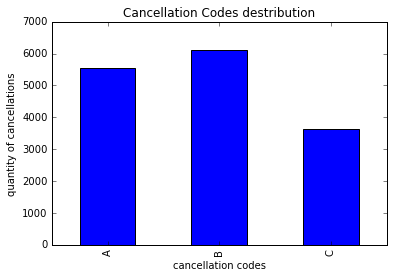

In [174]:
s1 = df["CancellationCode"].value_counts()
Cancellation_Series = s1.sort_index()
print('Cancellation Codes destribution')
print(Cancellation_Series)
Cancellation_Series.plot(kind = 'bar', title = 'Cancellation Codes destribution')
plt.ylabel('quantity of cancellations')
plt.xlabel('cancellation codes')

**Задание 3:** Найти самый популярный маршрут, выдать статистику по данному маршруту.

In [175]:
# Находим самый популярный маршрут
routes = "from " + df['Origin'] +" to " + df['Dest']
the_most_popular = routes.value_counts()[:1]
print(the_most_popular)

from LAX to LAS    1114
dtype: int64


In [176]:
# Выведем по нему статистику

#выберем из таблицы только те данные, которые нас интересуют 
popular_df = df[(df['Origin'] == "LAX") & (df['Dest'] == "LAS")]
#print(popular_df.columns)

#заметим, что по некоторым колонкам с помощью функции describe будет получаться статистика, не имеющая смысла 
#например,при вычислении причин задержки рейсов
#поэтому метод describe будет применен только к тем колонкам, где он дает корректные результаты и имеет смысл
print('summary decription')
display(popular_df.describe()[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'FlightNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance',
       'TaxiIn', 'TaxiOut']])

#для получения дополнительной статистики по оставшимся колонкам сделаем следующее:

#Во-первых, вычислим, сколько рейсов было отменено по данному маршруту
quantity_cancellatoins = popular_df[popular_df['Cancelled'] == 1][['Cancelled']].size
print('\n' + "quantity cancellatoins = " + str(quantity_cancellatoins))
#Во-вторых,вычислим, сколько рейсов было переадресовано по данному маршруту
quantity_diveted = popular_df[popular_df['Diverted'] == 1][['Diverted']].size
print('\n' + "quantity of diverted = " + str(quantity_diveted))
#В-третьих, корректно вычислим статистику по задержанным рейсам
#чтобы 0 минут задержки не были рассчитаны,как задержка по указанной причине,заменим 0 на NaN
delay_df = popular_df[['CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]
print('\n'+'delay description')
display(delay_df.replace(0, np.nan).describe())
#В-четвертых, получим информацию про перевозчика:
print('Carriers which have flights from LAX to LAS:')
display(popular_df["UniqueCarrier"].value_counts())

summary decription


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut
count,1114,1114,1114.000000,1114.000000,1096.000000,1114.000000,1096.000000,1114.000000,1114.000000,1096.000000,1114.000000,1096.000000,1096.000000,1096.000000,1114,1096.000000,1096.000000
mean,2008,1,15.973968,3.878815,1369.796533,1361.672352,1458.262774,1470.333034,1644.912029,67.809307,67.547576,44.832117,13.840328,13.588504,236,6.604015,16.373175
std,0,0,8.955829,1.939480,486.162518,472.364047,498.443563,472.188087,1510.089734,12.220992,3.587938,3.383159,41.205300,38.305232,0,3.952011,10.758468
min,2008,1,1.000000,1.000000,5.000000,600.000000,9.000000,14.000000,22.000000,50.000000,60.000000,36.000000,-26.000000,-42.000000,236,2.000000,1.000000
25%,2008,1,8.000000,2.000000,1001.000000,955.000000,1058.500000,1100.000000,495.000000,60.000000,65.000000,43.000000,-6.000000,-4.000000,236,4.000000,10.000000
50%,2008,1,16.000000,4.000000,1332.000000,1330.000000,1442.000000,1440.000000,1492.000000,66.000000,67.000000,45.000000,1.000000,0.000000,236,6.000000,14.000000
75%,2008,1,24.000000,5.000000,1813.250000,1800.000000,1905.250000,1906.000000,2624.000000,73.000000,70.000000,47.000000,15.000000,14.000000,236,7.000000,20.000000
max,2008,1,31.000000,7.000000,2343.000000,2305.000000,2400.000000,2354.000000,7720.000000,192.000000,75.000000,76.000000,340.000000,350.000000,236,49.000000,141.000000



quantity cancellatoins = 18

quantity of diverted = 0

delay description


,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,130.000000,7.000000,177.000000,1,186.000000
mean,33.615385,72.000000,25.485876,15,43.483871
std,50.519991,62.795966,36.578699,NaN,44.022258
min,1.000000,5.000000,1.000000,15,1.000000
25%,9.000000,28.000000,5.000000,15,16.000000
50%,15.500000,42.000000,13.000000,15,29.000000
75%,32.500000,119.000000,23.000000,15,49.000000
max,299.000000,163.000000,203.000000,15,219.000000


Carriers which have flights from LAX to LAS:


WN    418
US    263
UA    190
MQ     94
YV     81
XE     37
NW     31
Name: UniqueCarrier, dtype: int64

**Задание 4:** Найти топ-5 рейсов по каждому из типов delay. Каким перевозчикам они принадлежат?

In [177]:
# причина задержки CarrierDelay
print("type is CarrierDelay")
print(df[df['CarrierDelay'] > 0]["FlightNum"].value_counts()[:5])
for i in range(5):
    flight_number = df[df['CarrierDelay'] > 0]["FlightNum"].value_counts().index[i]
    print("flight number " + str(flight_number)+ " belongs to ", 
      ','.join(list(df[df["FlightNum"] == flight_number]['UniqueCarrier'].value_counts().index)))

# причина задержки WeatherDelay
print("type is WeatherDelay")
print(df[df['WeatherDelay'] > 0]["FlightNum"].value_counts()[:5])
for i in range(5):
    flight_number = df[df['WeatherDelay'] > 0]["FlightNum"].value_counts().index[i]
    print("flight number " + str(flight_number)+ " belongs to ", 
      ','.join(list(df[df["FlightNum"] == flight_number]['UniqueCarrier'].value_counts().index)))

# причина задержки NASDelay
print("type is NASDelay")
print(df[df['NASDelay'] > 0]["FlightNum"].value_counts()[:5])
for i in range(5):
    flight_number = df[df['NASDelay'] > 0]["FlightNum"].value_counts().index[i]
    print("flight number " + str(flight_number)+ " belongs to ", 
      ','.join(list(df[df["FlightNum"] == flight_number]['UniqueCarrier'].value_counts().index)))

# причина задержки SecurityDelay
print("type is SecurityDelay")
print(df[df['SecurityDelay'] > 0]["FlightNum"].value_counts()[:5])
for i in range(5):
    flight_number = df[df['SecurityDelay'] > 0]["FlightNum"].value_counts().index[i]
    print("flight number " + str(flight_number)+ " belongs to ", 
      ','.join(list(df[df["FlightNum"] == flight_number]['UniqueCarrier'].value_counts().index)))

# причина задержки LateAircraftDelay:
print("type is LateAircraftDelay")
print(df[df['LateAircraftDelay'] > 0]["FlightNum"].value_counts()[:5])
for i in range(5):
    flight_number = df[df['LateAircraftDelay'] > 0]["FlightNum"].value_counts().index[i]
    print("flight number " + str(flight_number)+ " belongs to ", 
      ','.join(list(df[df["FlightNum"] == flight_number]['UniqueCarrier'].value_counts().index)))


type is CarrierDelay
224    57
294    55
534    54
892    53
43     51
Name: FlightNum, dtype: int64
flight number 224 belongs to  WN,XE,UA,F9,US,NW,FL
flight number 294 belongs to  US,WN,NW,AA,UA,F9,FL
flight number 534 belongs to  WN,UA,NW,F9,FL,US,DL
flight number 892 belongs to  WN,AA,UA,FL,NW,US
flight number 43 belongs to  WN,XE,UA,US,AA,HA
type is WeatherDelay
143     17
730     14
5510    14
1177    13
5032    12
Name: FlightNum, dtype: int64
flight number 143 belongs to  US,XE,AA,UA,HA,NW,WN
flight number 730 belongs to  UA,WN,US,AA,NW,FL,DL
flight number 5510 belongs to  OH,OO
flight number 1177 belongs to  NW,US,UA,DL,WN
flight number 5032 belongs to  OH
type is NASDelay
321    74
343    74
365    70
357    67
623    65
Name: FlightNum, dtype: int64
flight number 321 belongs to  US,AA,UA,NW,WN,XE,FL
flight number 343 belongs to  NW,UA,WN,FL,US,AA,HA
flight number 365 belongs to  US,UA,NW,FL,WN,AA
flight number 357 belongs to  AA,UA,NW,FL,WN
flight number 623 belongs to  NW,U

**Задание 5:** Определить, как распределено количество рейсов от времени дня?

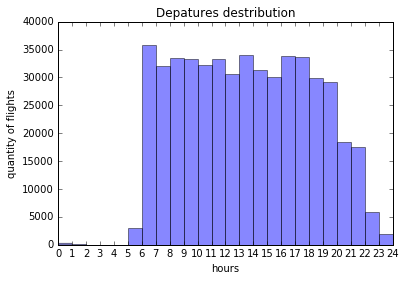

In [178]:
#построим распределение количества запланированных вылетов в зависимости от времени дня
ticks = np.arange(0, 25, 1) 
ax = plt.subplot(1,1,1)  
ax.set_xticks(ticks)
my_bins = np.linspace(0,24,25)
ax.hist(df["CRSDepTime"] / 100, bins = my_bins, color = 'blue', alpha = 0.47)
plt.title('Depatures destribution')
plt.ylabel('quantity of flights')
plt.xlabel('hours')
plt.show()

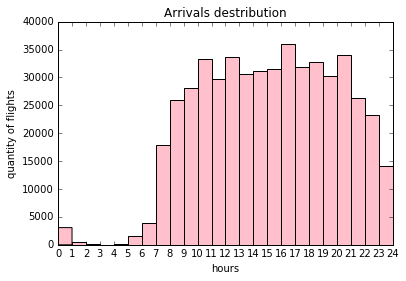

In [179]:
#построим распределение количества запланированных прилетов в зависимости от времени дня
ticks = np.arange(0, 25, 1) 
ax = plt.subplot(1,1,1)  
ax.set_xticks(ticks)
my_bins = np.linspace(0,24,25)
ax.hist(df["CRSArrTime"] / 100, bins = my_bins, color = 'pink', alpha = 1)
plt.title('Arrivals destribution')
plt.ylabel('quantity of flights')
plt.xlabel('hours')
plt.show()

**Задание 6:** Определить "сезонность" во временных рядах по количеству вылетов на каждый день.

In [96]:
# ВАЖНО!!!!

# в первых 500000 строках находилась информация только за январь,
# поэтому сезонность будет рассчитана для каждых 7 дней, с 1 по 28 января, 
# символизируя таким образом сезонность по первым 4 неделям января
# 1 января - вторник, поэтому в данных расчетах недели будут начинаться со вторника

In [98]:
# посчитаем сколько было полетов каждый день в январе
January = pd.Series(df["DayofMonth"])
Flights_January = January.value_counts().sort_index()
#посчитаем сколько было полетов каждый день за каждую из четырех первых недель января
first_week = Flights_January[:7]
second_week = Flights_January[7:14]
second_week.index = range(1,8)
third_week = Flights_January[14:21]
third_week.index = range(1,8)
fofth_week = Flights_January[21:28]
fofth_week.index = range(1,8)

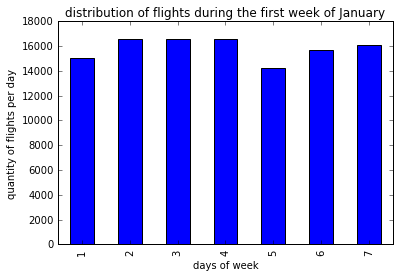

In [99]:
#посторим распределение полетов за 1 неделю января
first_week.plot(kind = 'bar', title = 'distribution of flights during the first week of January')
plt.ylabel('quantity of flights per day')
plt.xlabel('days of week')

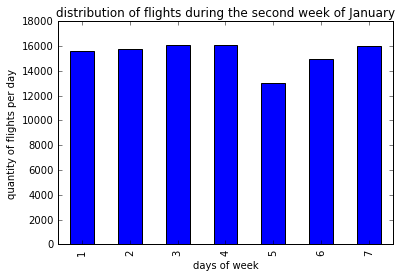

In [100]:
#посторим распределение полетов за 2 неделю января
second_week.plot(kind = 'bar', title = 'distribution of flights during the second week of January')
plt.ylabel('quantity of flights per day')
plt.xlabel('days of week')

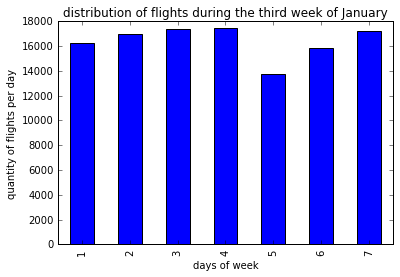

In [101]:
#посторим распределение полетов за 3 неделю января
third_week.plot(kind = 'bar', title = 'distribution of flights during the third week of January')
plt.ylabel('quantity of flights per day')
plt.xlabel('days of week')

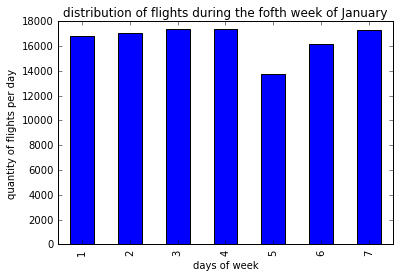

In [102]:
#посторим распределение полетов за 4 неделю января
fofth_week.plot(kind = 'bar', title = 'distribution of flights during the fofth week of January')
plt.ylabel('quantity of flights per day')
plt.xlabel('days of week')

In [114]:
# вычислим "высокий" и "низкий" сезоны
quantity_of_flights = []
quantity_of_flights.append(first_week.sum(axis = 0))
quantity_of_flights.append(second_week.sum(axis = 0))
quantity_of_flights.append(third_week.sum(axis = 0))
quantity_of_flights.append(fofth_week.sum(axis = 0))
for i in range(4):
    if quantity_of_flights[i] == max(quantity_of_flights):
        print('the week № ' + str(i + 1) + ' has more flights than others: ' + str(max(quantity_of_flights)))
    if quantity_of_flights[i] == min(quantity_of_flights):
        print('the week № ' + str(i + 1) + ' has less flights than others: ' + str(min(quantity_of_flights)))    

the week № 2 has less flights than others: 107485
the week № 4 has more flights than others: 115752


### 2. Продолжаем изучать Pandas

Ввиду ограниченности времени, мы не успеваем рассмотреть всё на семинарах. Поэтому часть работы ложится на вас..

Загрузите две csv таблицы [отсюда](https://github.com/emorisse/FBI-Hate-Crime-Statistics) и импортируйте через Pandas. В них содержатся агрегированные данные по различным организациям\городам США, содержащие количество обращений по тем или иным случаям нарушения закона. В одной таблице (table13.csv) перечислены управления, которые сообщали об этих случаях, в другой - которые не сообщали.

**Задание 1:** Изучите документации для методов `unique_values`, `isin`. С помощью этой функции, определите, содержатся ли в двух таблицах одни и те же штаты.

In [180]:
table13 = pd.read_csv('table13.csv')
table14 = pd.read_csv('table14.csv')
#посмотрим, как выглядят наши данные
display(table13)
display(table14)
print(table13.columns)
print(table14.columns)

,State,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population
0,Alabama,Cities,Florence,2,0,0,0,0,0,0,0,1,0,1,"39,481"
1,Alabama,Cities,Hoover,0,0,1,0,0,0,0,0,1,0,0,"84,139"
2,Alabama,Cities,Prattville,2,0,0,0,0,0,0,1,0,1,0,"35,154"
3,Alabama,Cities,Tuscaloosa,1,0,0,0,0,0,0,0,0,1,0,"94,126"
4,Alaska,Cities,Anchorage,8,0,0,0,0,0,0,2,3,3,0,"299,455"
5,Arizona,Cities,Apache Junction,1,0,0,0,0,0,0,1,0,0,NaN,"36,626"
6,Arizona,Cities,Avondale,4,0,0,1,0,0,0,1,1,3,0,"78,905"
7,Arizona,Cities,Eagar,0,0,0,1,0,0,0,0,1,0,0,"5,034"
8,Arizona,Cities,El Mirage,1,0,0,0,0,0,0,0,0,1,0,"32,837"
9,Arizona,Cities,Gilbert,1,0,0,0,0,0,0,1,0,0,0,"225,232"


,State,Agency Type,Agency Name,Q1,Q2,Q3,Q4,Population
0,Alabama,Cities,Ashford,0,0,0,0,"2,177"
1,Alabama,Cities,Ashland,0,0,0,0,"1,926"
2,Alabama,Cities,Auburn,0,0,0,0,"57,970"
3,Alabama,Cities,Berry,NaN,0,NaN,NaN,"1,124"
4,Alabama,Cities,Childersburg,0,0,0,0,"5,111"
5,Alabama,Cities,Courtland,0,0,0,0,607
6,Alabama,Cities,Demopolis,0,0,0,0,"7,240"
7,Alabama,Cities,Eclectic,0,0,0,0,"1,015"
8,Alabama,Cities,Enterprise,0,0,0,0,"28,145"
9,Alabama,Cities,Eutaw,0,0,0,0,"2,871"


Index(['State', 'Agency type', 'Agency name', 'Race', 'Religion',
       'Sexual orientation', 'Ethnicity', 'Disability', 'Gender',
       'Gender Identity', '1st quarter', '2nd quarter', '3rd quarter',
       '4th quarter', 'Population'],
      dtype='object')
Index(['State', 'Agency Type', 'Agency Name', 'Q1', 'Q2', 'Q3', 'Q4',
       'Population'],
      dtype='object')


In [181]:
states13 = pd.Series(table13['State'].unique()) #найдем все штаты таблицы 13
print("quantity of states in the table 13 = " + str(states13.size))
states14 =list(table14['State'].unique()) #найдем все штаты таблицы 14
print("\n" + "quantity of states in the table 14 = " + str(len(states14)))
states13_vs_states14 = states13.isin(states14)
states13_and_14 = states13[states13_vs_states14] #найдем все штаты,содержащиеся в обеих таблицах
print("\n" + "quantity of states wchich are in both tables = " + str(states13_and_14.size))
if states13_and_14.size == 0:
    print("there is no identical state in both tables")
else:
    print("\n" + "States which are in both tables")
    for state in list(states13_and_14):
        print(state)


quantity of states in the table 13 = 50

quantity of states in the table 14 = 48

quantity of states wchich are in both tables = 48

States which are in both tables
Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
Florida
Georgia
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
New_Hampshire
New_Jersey
New_Mexico
New_York
North_Carolina
North_Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode_Island
South_Carolina
South_Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West_Virginia
Wisconsin
Wyoming


**Задание 2:** Изучите документации для методов `append`, `merge` и `concat`. Совместите две таблицы в одну.

In [182]:
#отредактируем названия колонок в таблице 14, чтобы они совпадали с названиями колонок в таблице 13
table14.columns = ['State', 'Agency type', 'Agency name', '1st quarter', '2nd quarter', '3rd quarter', '4th quarter', 'Population']
#соединим таблицы
table = pd.concat([table13,table14], ignore_index = True)
table = table[table13.columns]
display(table)

,State,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population
0,Alabama,Cities,Florence,2,0,0,0,0,0,0,0,1,0,1,"39,481"
1,Alabama,Cities,Hoover,0,0,1,0,0,0,0,0,1,0,0,"84,139"
2,Alabama,Cities,Prattville,2,0,0,0,0,0,0,1,0,1,0,"35,154"
3,Alabama,Cities,Tuscaloosa,1,0,0,0,0,0,0,0,0,1,0,"94,126"
4,Alaska,Cities,Anchorage,8,0,0,0,0,0,0,2,3,3,0,"299,455"
5,Arizona,Cities,Apache Junction,1,0,0,0,0,0,0,1,0,0,NaN,"36,626"
6,Arizona,Cities,Avondale,4,0,0,1,0,0,0,1,1,3,0,"78,905"
7,Arizona,Cities,Eagar,0,0,0,1,0,0,0,0,1,0,0,"5,034"
8,Arizona,Cities,El Mirage,1,0,0,0,0,0,0,0,0,1,0,"32,837"
9,Arizona,Cities,Gilbert,1,0,0,0,0,0,0,1,0,0,0,"225,232"


**Задание 3:** Изучите документации для методов `drop_dublicates` и `dropna`. Используйте метод `dropna` для очистки большой таблицы от пропусков. Что произошло? Почему? Исправьте таблицы, чтобы получить корректный ответ.

In [183]:
#применяем метод dropna
table_without_Nan = table.dropna()
display(table_without_Nan)
print('quantity of the lost rows = ' + str(table.dropna().shape[0]))
#заметим, что в таблице осталось 1372 строки, другие исчезли, так как в них содержались пропуски

,State,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population
0,Alabama,Cities,Florence,2,0,0,0,0,0,0,0,1,0,1,"39,481"
1,Alabama,Cities,Hoover,0,0,1,0,0,0,0,0,1,0,0,"84,139"
2,Alabama,Cities,Prattville,2,0,0,0,0,0,0,1,0,1,0,"35,154"
3,Alabama,Cities,Tuscaloosa,1,0,0,0,0,0,0,0,0,1,0,"94,126"
4,Alaska,Cities,Anchorage,8,0,0,0,0,0,0,2,3,3,0,"299,455"
6,Arizona,Cities,Avondale,4,0,0,1,0,0,0,1,1,3,0,"78,905"
7,Arizona,Cities,Eagar,0,0,0,1,0,0,0,0,1,0,0,"5,034"
8,Arizona,Cities,El Mirage,1,0,0,0,0,0,0,0,0,1,0,"32,837"
9,Arizona,Cities,Gilbert,1,0,0,0,0,0,0,1,0,0,0,"225,232"
10,Arizona,Cities,Glendale,2,3,1,1,0,0,0,2,0,3,2,"234,006"


quantity of the lost rows = 1372


In [229]:
#так как я изначально позаботилась о том, чтобы названия столбцов в таблицах были написаны одинаково,
#то общая таблица после метода dropna не стала пустой

#заметим, что все значения таблицы 14 пропали, так как все строчки содержали NaN
#также пропали нектороые строки таблицы 13

**Задание 4:** Изучите документации для методов `set_index`, `reset_index` и `pivot_table`. Проиндексируйте общую таблицу по переменным State и Agency Type (одновременно). У вас должен появиться *мультииндекс*.

In [ ]:
#в этом задании я использую полную общую таблицу,т.е. до применения к ней метода dporna

In [184]:
#для удобства отсортируем общую таблицу по штатам
sorted_table = table.sort_values(['State', 'Agency type'])
#индексируем общую таблицу по переменным State и Agency Type
multiindex_table = sorted_table.set_index(['State', 'Agency type'])
display(multiindex_table)

Agency name  \
State   Agency type                                                             
Alabama Cities                                                       Florence   
        Cities                                                         Hoover   
        Cities                                                     Prattville   
        Cities                                                     Tuscaloosa   
        Cities                                                        Ashford   
        Cities                                                        Ashland   
        Cities                                                         Auburn   
        Cities                                                          Berry   
        Cities                                                   Childersburg   
        Cities                                                      Courtland   
        Cities                                                      Demopolis   
        Cities                                                       Eclectic   
        Cities                                                     Enterprise   
        Cities                                                          Eutaw   
        Cities                                                       Fairhope   
        Cities                                                          Foley   
        Cities                                                        Gadsden   
        Cities                                                         Geneva   
        Cities                                                        Glencoe   
        Cities                                                   Guntersville   
        Cities                                                     Hanceville   
        Cities                                                     Huntsville   
        Cities                                                       Irondale   
        Cities                                                         Jasper   
        Cities                                                      Lafayette   
        Cities                                                   Level Plains   
        Cities                                                   Midland City   
        Cities                                                         Mobile   
        Cities                                                  Muscle Shoals   
        Cities                                                        Oneonta   
...                                                                       ...   
Wyoming Cities                                                       Sundance   
        Cities                                                    Thermopolis   
        Cities                                                     Torrington   
        Cities                                                      Wheatland   
        Cities                                                        Worland   
        Metropolitan Counties                                         Laramie   
        Metropolitan Counties                                         Natrona   
        Nonmetropolitan Counties                                       Albany   
        Nonmetropolitan Counties                                     Big Horn   
        Nonmetropolitan Counties                                     Campbell   
        Nonmetropolitan Counties                                       Carbon   
        Nonmetropolitan Counties                                     Converse   
        Nonmetropolitan Counties                                        Crook   
        Nonmetropolitan Counties                                      Fremont   
        Nonmetropolitan Counties                                       Goshen   
        Nonmetropolitan Counties                                  Hot Springs   
        Nonmetropolitan Counties                                      Johnson   
        Nonmetro

**Задание 5:** В Pandas можно итерировать по DataFrame! Изучите документации для методов `iteritems`, `iterrows`, а так же посмотрите, как можно итерировать по сгруппированным DataFrame'ам. Выделите подтаблицу, состоящую из данных по 3 произвольным штатам и сгруппируйте её по переменным State и Agency Type. С помощью изученных методов (то есть итеративно) выведите суммарную популяцию по каждой паре <Штат>-<Тип>

In [185]:
#создадим новую таблицу с данными только по трем штатам DC, Texas, Arkansas
states = ['Texas', 'Arkansas', 'DC']
three_states = table_without_Nan[table_without_Nan['State'].isin(states)]
#отсортируем и сгруппируем новую таблицу по переменным State и Agency Type
sorted_three_states = three_states.sort_values(['State', 'Agency type'])
multiindex_three_states = sorted_three_states.set_index(['State', 'Agency type'])
display(multiindex_three_states) #выведем получившуюся таблицу


    

Agency name  Race  \
State    Agency type                                                           
Arkansas Cities                                            Bentonville     1   
         Cities                                             Berryville     1   
         Cities                                                  Cabot     1   
         Cities                                                England     1   
         Cities                                          Fairfield Bay     1   
         Cities                                             Fort Smith     1   
         Cities                                                 Gurdon     1   
         Cities                                                 Marion     0   
         Cities                                      North Little Rock     1   
         Cities                                             Pine Bluff     0   
         Cities                                                 Rogers     1   
         Cities                                               Sherwood     1   
         Universities and Colleges  University of Arkansas, Pine Bluff     0   
DC       Cities                                             Washington    18   
Texas    Cities                                                 Austin     0   
         Cities                                               Beaumont     3   
         Cities                                               Bellaire     0   
         Cities                                               Bellmead     2   
         Cities                                               Benbrook     1   
         Cities                                              Brownwood     1   
         Cities                                               Carthage     0   
         Cities                                               Commerce     1   
         Cities                                         Corpus Christi     0   
         Cities                                                 Dallas     3   
         Cities                                                Denison     1   
         Cities                                                 Denton     1   
         Cities                                                El Paso     0   
         Cities                                             Fort Worth     9   
         Cities                                                 Frisco     1   
         Cities                                            Gainesville     1   
         Cities                                                Garland     1   
         Cities                                              Grapevine     1   
         Cities                                              Harlingen     1   
         Cities                                                Houston     4   
         Cities                                              Lancaster     0   
         Cities                                               Longview     1   
         Cities                                           Marble Falls     1   
         Cities                                                McAllen     0   
         Cities                                               McKinney     1   
         Cities                                               Mercedes     1   
         Cities                                          Mineral Wells     0   
         Cities                                               Pasadena     1   
         Cities                                                  Plano     1   
         Cities                                               Richmond     0   
         Cities                                             San Angelo     1   
         Cities                                            San Antonio     3   
         Cities                                             Springtown     0   
         Cities                                                 Temple     1   
         Cities                                            

In [188]:
#создадим множество, где будут находиться пары <Штат>-<Тип>
States_AgTypes = set()
for index in list(multiindex_three_states.index):
    States_AgTypes.add(index)
#создадим словарь, куда, каждый раз встречая значение в столбце Poputation c индексом <Штат>-<Тип>, 
#будем прибавлять значение популяции
populations = dict()
for state in States_AgTypes:
    populations[state] = 0
#поиск пар <Штат>-<Тип>, как индексов значений в столбце Population
for column, corresp_series in multiindex_three_states.iteritems():
    if column == 'Population':
        for frame_label, population in corresp_series.iteritems():
            populations[frame_label] += int(str(population).replace(',',''))
for pop in populations:
    print("state = " + str(pop[0]) +", Agency type = " + str(pop[1]) + ', Population = ' + str(populations[pop]))

state = Texas, Agency type = Cities, Population = 9568324
state = Arkansas, Agency type = Cities, Population = 378092
state = Texas, Agency type = Universities and Colleges, Population = 74609
state = DC, Agency type = Cities, Population = 646449
state = Arkansas, Agency type = Universities and Colleges, Population = 2828


## 3. Метод градиентного спуска

Напомним суть метода градиентого спуска в контексте задачи линейной регрессии.

Дано описание $n$ объектов по $m$ признакам. Обычно оно выражается в виде матрицы размера $n \times m$: $X = [x^{(i)}_j]^{i=1\dots n}_{j=1\dots m} $.<br\> ($x^{(i)}_j$ означает $j$-ый признак $i$-го объекта) <br\>
Дана зависимая переменная, которая тоже имеет отношение к этим объекам: $y$ - вектор длины $n$.

Наша задача, выявить **линейную** зависимость между признаками в $X$ и значениями в $y$:
$$\hat{y} = X\beta \quad \Leftrightarrow \quad \hat{y}^{(i)} = \beta_0 + \beta_1x^{(i)}_1 + \dots$$

И сделать это так, чтобы квадрат суммы ошибок наших оценок был минимален:
$$ L(\beta) = \frac{1}{2n}(\hat{y} - y)^{\top}(\hat{y} - y) = \frac{1}{2n}(X\beta - y)^{\top}(X\beta - y) \rightarrow \min$$ $$ \Updownarrow $$  $$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{2n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 + \dots - y^{(i)})^2  \rightarrow \min $$

Значение в $X$ и $y$ нам даны. Нам неизвестны только значения коэффициентов $\beta$.<br\> Соответственно, нужно найти такие значения $\beta$, что функция $L(\beta) \rightarrow \min.$

На семинаре мы выяснили, чему равен градиент функции потерь $L(\beta_0, \beta_1):$
$$ \frac{\partial L}{\partial \beta_0} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})$$
$$ \frac{\partial L}{\partial \beta_1} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})x_1^{(i)}$$

Иногда проще это записать в виде матриц:
$$ \frac{\partial L}{\partial \beta} = X^\top(X\beta - y)$$


Метод градиентного спуска заключается в итеративном и **одновременном(!!!)** обновлении значений $\beta$ в направлении, противоположному градиенту:
$$ \beta := \beta - \alpha\frac{\partial L}{\partial \beta}$$

**Задача 1:** Загрузите [данные](http://bit.ly/1gIQs6C) по характеристикам автомобилей Honda Accord. Названия столбцов говорят сами за себя.

Составьте матрицу $X$, состоящую из единичного столбца и признака "пробег". <br\>
Составьте вектор $y$ состоящий из стоимости автомобиля.

Если для импорта вы используете `pandas`, то через .values из DataFrame можно получить numpy array.

In [66]:
#посмотрим, какие данные лежат в таблице
df3 = pd.read_csv('accord_sedan_training.csv')
display(df3.head())


,price,mileage,year,trim,engine,transmission
0,14995,67697,2006,ex,4 Cyl,Manual
1,11988,73738,2006,ex,4 Cyl,Manual
2,11999,80313,2006,lx,4 Cyl,Automatic
3,12995,86096,2006,lx,4 Cyl,Automatic
4,11333,79607,2006,lx,4 Cyl,Automatic


In [3]:
#создадим массив всех значений, чтобы по нему было удобно итерироваться при создании Х и У
df_val = df3.values
#print(df_val)

matrix_X = np.zeros((len(df_val),2))
column_Y = np.zeros((len(df_val),1))
for i in range(len(df_val)):
    matrix_X[i][0] = 1
    matrix_X[i][1] = df_val[i][1]
    column_Y[i] = df_val[i][0]
print('matrix X')
print(matrix_X)
print('column Y')
print(column_Y)

matrix X
[[  1.00000000e+00   6.76970000e+04]
 [  1.00000000e+00   7.37380000e+04]
 [  1.00000000e+00   8.03130000e+04]
 [  1.00000000e+00   8.60960000e+04]
 [  1.00000000e+00   7.96070000e+04]
 [  1.00000000e+00   9.69660000e+04]
 [  1.00000000e+00   1.26150000e+05]
 [  1.00000000e+00   1.19255000e+05]
 [  1.00000000e+00   7.35130000e+04]
 [  1.00000000e+00   5.06490000e+04]
 [  1.00000000e+00   9.00000000e+04]
 [  1.00000000e+00   1.14340000e+05]
 [  1.00000000e+00   7.52700000e+04]
 [  1.00000000e+00   5.46850000e+04]
 [  1.00000000e+00   6.84800000e+04]
 [  1.00000000e+00   1.07290000e+05]
 [  1.00000000e+00   3.91440000e+04]
 [  1.00000000e+00   4.28930000e+04]
 [  1.00000000e+00   1.03650000e+05]
 [  1.00000000e+00   5.91000000e+04]
 [  1.00000000e+00   9.64040000e+04]
 [  1.00000000e+00   5.94660000e+04]
 [  1.00000000e+00   8.96920000e+04]
 [  1.00000000e+00   9.14860000e+04]
 [  1.00000000e+00   9.02560000e+04]
 [  1.00000000e+00   8.59760000e+04]
 [  1.00000000e+00   1.038330

**Задача 2:** Изобразите функционал квадратичной ошибки $L(\beta_0, \beta_1)$ в 3D и его линии уровня

In [14]:
#загрузим пакет, позволяющий рисовать 3D картинки
from mpl_toolkits import mplot3d

In [115]:
#сгенерируем значения для построения графика
betta_0 = np.linspace(-50000, 50000, 500)
betta_1 = np.linspace(-2, 2, 400)
B0, B1  = np.meshgrid(betta_0,betta_1)

#выведем формулу для функционала квадратичной ошибки
S = 0.0
for i in range(len(column_Y)):
    S += (B0 + B1*matrix_X[i][1] - column_Y[i])**2
L = (1/(2*len(column_Y)))*S


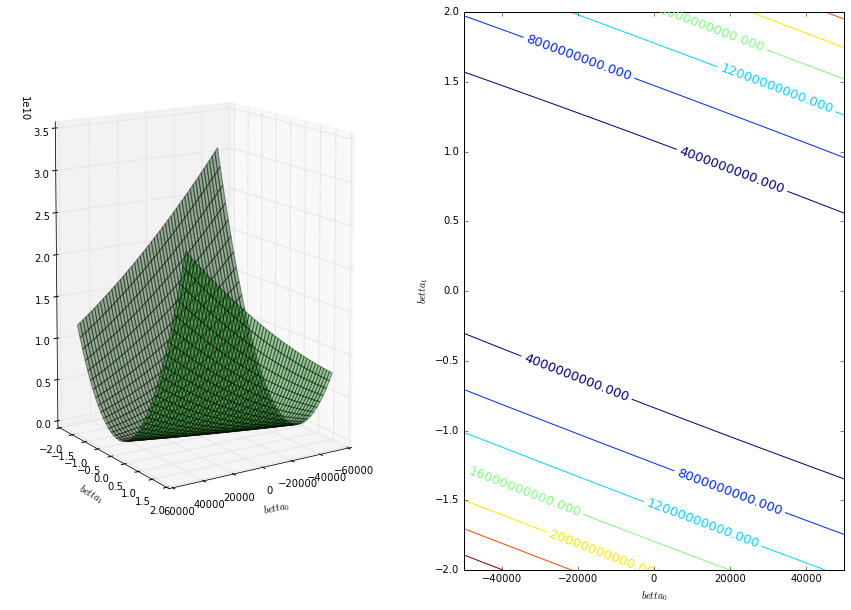

In [116]:
fig = plt.figure(figsize=(15,10))
# построим 3D график
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.view_init(10,57)
ax.plot_surface(B0, B1, L, alpha=0.4, color = 'green')
ax.set_xlabel('$betta_0$')
ax.set_ylabel('$betta_1$')
#построим линии уровня
ax = fig.add_subplot(1, 2, 2) 
contour = ax.contour(B0, B1, L) 
plt.clabel(contour, inline = True, fontsize = 13)
ax.set_xlabel('$betta_0$')
ax.set_ylabel('$betta_1$')

**Задача 3:** Напишите код, реализующий метод градиентного спуска. На вход метод должен принимать исходные данные, максимальное кол-во итераций и коэффициент скорости спуска.

In [149]:
#осуществляем метод градиентного спуска по нашим данным
def GradienDescent2_1(X, Y, N, a):
    B0, B1 = 20000.0, -0.125
    for i in range (N):
        dLdB0, dLdB1 = 0, 0
        for j in range (0, len(Y)):
            dLdB0 += B0 + B1 * X[j][1] - Y[j]
            dLdB1 += (B0 + B1 * X[j][1] - Y[j]) * X[j][1]
        B0 -= a * dLdB0
        B1 -= a * dLdB1
    return (B0, B1)

B0, B1 = GradienDescent2_1(matrix_X, column_Y, 1000, 0.0000000000001)
    

**Задача 4:** Выведите полученные значения коэфициентов $\beta$. <br\>Как они интерпретируются?  <br\>Изобразите на одном графике $[y - \text{"пробег"}]$ точки и полученную прямую.

In [151]:
print('coefficient betta_0 = ' + str(B0[0]))
print('coefficient betta_1 = ' + str(B1[0]))

coefficient betta_0 = 19999.99999
coefficient betta_1 = -0.0854407349954


In [ ]:
#коэффициент betta_1 интерпретируется так: при изминении значения переменной "пробега" на 1 единицу, 
#значение переменной "цена" меняется на betta_1(примерно - 0.085)
#коэффициент betta_0 интерпретируется так: цена авто без пробега примерно равнаb betta_0 (примерно,20000)

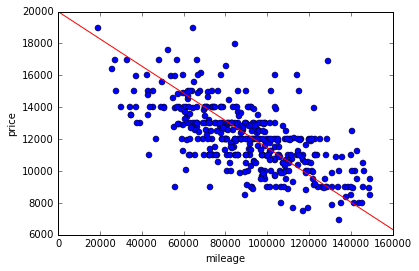

In [169]:
#изобразим исходные данные и линейное приближение на одном графике
X, Y = matrix_X, column_Y
X = np.delete(X, 0, 1)
X = list(X.reshape(X.size))
Y = list(Y.reshape(Y.size))
plt.plot(X, Y, 'bo')
plt.xlabel('mileage')
plt.ylabel('price')
plt.plot([0, 160000], [B1[0] * 0 + B0[0], B1[0] * 160000 + B0[0]], 'r-')

In [ ]:
#Ура!!! Конец!